# About

In this notebook we show how to use inside IPython __ROOT__ (C++ library, de-facto standard in High Energy Physics).

This notebook is aimed to help __ROOT__ users.

Working using ROOT-way loops is very slow in python and in most cases useless.

You're proposed to use `root_numpy` - a very convenient python library to operate with ROOT (`root_numpy` is included in REP docker).

### Allowing inline plots

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Creating ROOT file using root_numpy

There are two libraries to work with ROOT files

* rootpy http://www.rootpy.org - direct wrapper to ROOT methods.
* root_numpy http://rootpy.github.io/root_numpy/ - new-style, efficient and simple library to deal with ROOT files from python

Let's show how to use the second library.

In [2]:
import numpy
import root_numpy
# generating random data
data = numpy.random.normal(size=[10000, 2])
# adding names of columns
data = data.view([('first', float), ('second', float)])
# saving to file
root_numpy.array2root(data, filename='./toy_datasets/random.root', treename='tree', mode='recreate')

In [3]:
!ls ./toy_datasets

MiniBooNE_PID.txt README.md         magic04.data      random.root


# Plot function using ROOT

pay attention that `canvas` is on the last line. This is an output value of cell.

When IPython cell return canvas, it is automatically drawn

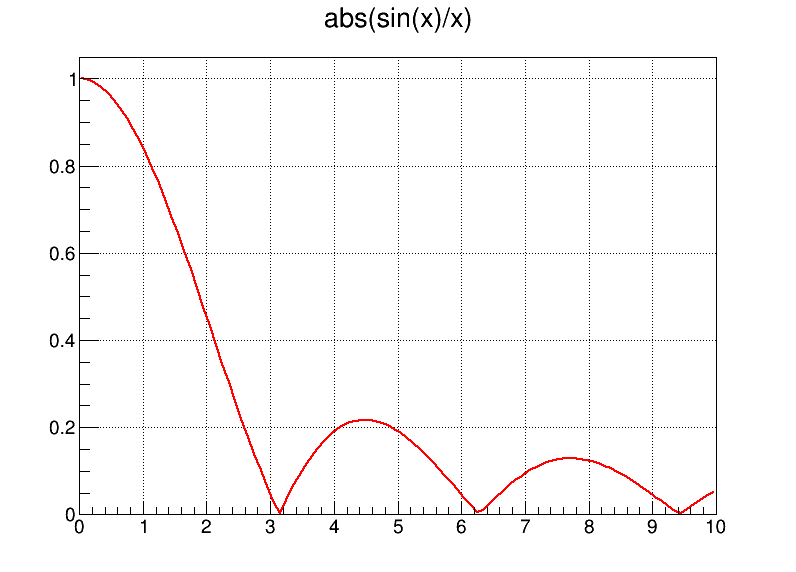

In [4]:
import ROOT
from rep.plotting import default_canvas
canvas = default_canvas()
fun1 = ROOT.TF1( 'fun1', 'abs(sin(x)/x)', 0, 10)
canvas.SetGridx()
canvas.SetGridy()
fun1.Draw()
# Drawing output (last line is considered as output of cell)
canvas

# Plot histogram using ROOT for branch in root file

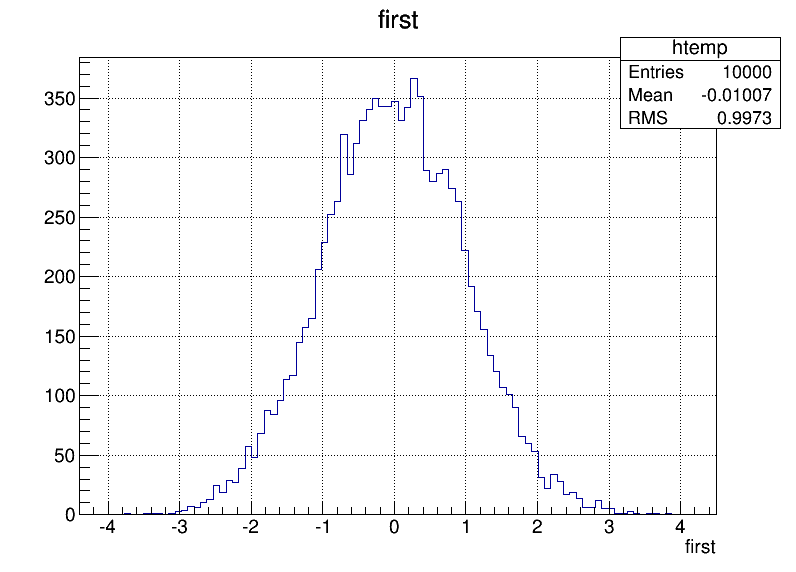

In [5]:
File = ROOT.TFile("toy_datasets/random.root")
Tree = File.Get("tree")
Tree.Draw("first")
canvas

## use histogram settings

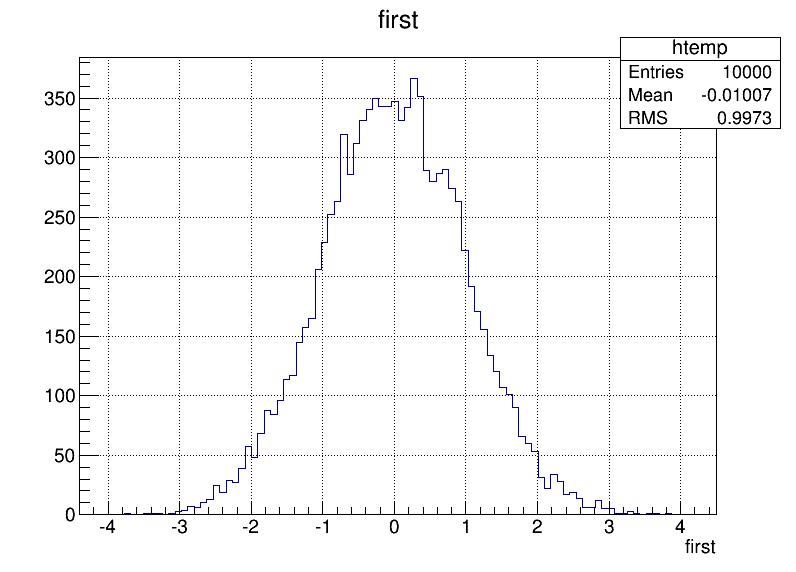

In [6]:
# we need to keep histogram in any variable, otherwise it will be deleted automatically
h1 = ROOT.TH1F("h1","hist from tree",50, -0.25, 0.25)
Tree.Draw("min_DOCA>>h1")
canvas

# root_numpy + ipython way

But IPython provides it's own plotting / data manipulation techniques. Brief demostration below.

Pay attention that we written the columns which will be evaluated on-the-fly.

In [4]:
data = root_numpy.root2array("toy_datasets/random.root", 
                             treename='tree', 
                             branches=['first', 'second', 'sin(first) * exp(second)'], 
                             selection='first > 0')

__in example above__ we selected three branches (one of which is an expression and will be computed on-the-fly) and selections

In [5]:
# taking, i.e. first 10 elements:
data2 = data[:10]

### convert to pandas

In [6]:
import pandas
dataframe = pandas.DataFrame(data)
# looking ar first elements
dataframe.head()

,first,second,sin(first) * exp(second)
0,0.149750,-0.065785,0.139692
1,0.267737,-0.073679,0.245759
2,1.129361,-1.795828,0.150078
3,1.615593,0.598223,1.817060
4,0.966476,0.890913,2.005671


In [7]:
# taking eleents, that satisfy some condition
dataframe[dataframe['second'] > 0].head()

,first,second,sin(first) * exp(second)
3,1.615593,0.598223,1.817060
4,0.966476,0.890913,2.005671
6,0.541703,0.886950,1.251720
8,0.320966,0.849261,0.737575
10,0.162410,0.806596,0.362244


In [8]:
# adding new column
dataframe['third'] = dataframe['first'] +  dataframe['second'] 
dataframe.head()

,first,second,sin(first) * exp(second),third
0,0.149750,-0.065785,0.139692,0.083965
1,0.267737,-0.073679,0.245759,0.194058
2,1.129361,-1.795828,0.150078,-0.666468
3,1.615593,0.598223,1.817060,2.213816
4,0.966476,0.890913,2.005671,1.857389


## Histograms in python

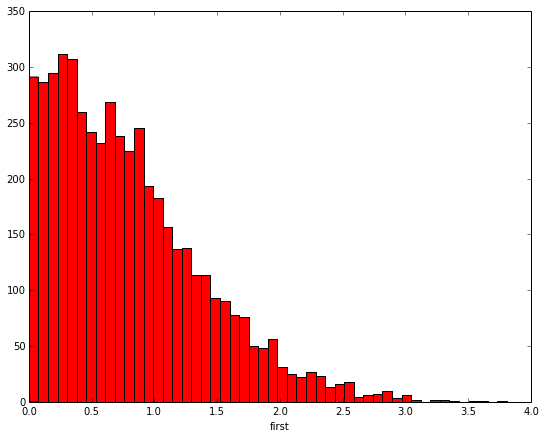

In [10]:
figure(figsize=(9, 7))
hist(data['first'], bins=50)
xlabel('first')

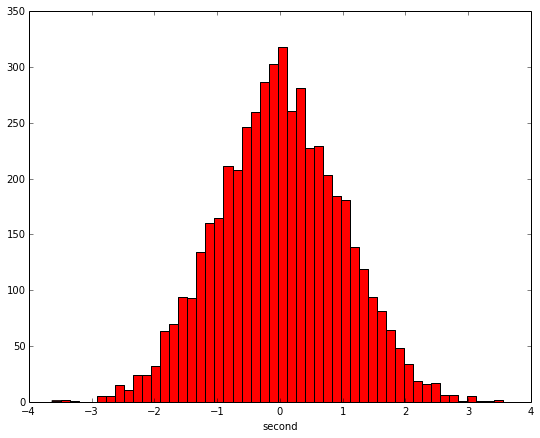

In [11]:
figure(figsize=(9, 7))
hist(data['second'], bins=50)
xlabel('second')